### Applied Machine Learning Midterm Project
### Nick Elias

* CSIS 44670-81
* Date: 4/18/2025

### Overview

- Businesses and organizations often need to understand the relationships between different factors to make better decisions.  
    - For example, a company may want to predict the fuel efficiency of a car based on its weight and engine size or estimate home prices based on square footage and location.  
- Regression analysis helps identify and quantify these relationships between numerical features, providing insights that can be used for forecasting and decision-making.  

This project demonstrates your ability to apply regression modeling techniques to a real-world dataset. You will:  
- Load and explore a dataset.  
- Choose and justify features for predicting a target variable.  
- Train a regression model and evaluate performance.  
- Compare multiple regression approaches.  
- Document your work in a structured Jupyter Notebook.  
- Conduct a peer review of a classmate's project.  

# Introduction

In [27]:
# Standard libraries
import os
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: Preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Scikit-learn: Model selection
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve

# Scikit-learn: Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Scikit-learn: Metrics
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)

from itertools import combinations

# Custom preprocessing pipeline
from preprocessing_pipeline import preprocess_data, pipeline

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

Section 1. Import and Inspect the Data
1.1 Load the dataset and display the first 10 rows.
1.2 Check for missing values and display summary statistics.
Reflection 1: What do you notice about the dataset? Are there any data issues?

In [2]:
# Load the dataset
data = pd.read_csv('data/train.csv')

# Display all columns in the DataFrame
pd.set_option('display.max_columns', None)

# Display the first 10 rows
print("First 10 rows of the dataset:")
print(data.head(10))

First 10 rows of the dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl

In [3]:
# Ensure all columns are displayed without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Adjusts the width to avoid wrapping
pd.set_option('display.max_colwidth', None)  # Ensures full content of each column is shown

# Display column names and their data types
print("Column names and their data types:")
print(data.dtypes)

Column names and their data types:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [4]:
# Display columns with missing data
missing_data = data.isnull().sum()
missing_columns = missing_data[missing_data > 0]
print("Columns with missing data:")
print(missing_columns)

Columns with missing data:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [5]:
# Display summary statistics
print("\nSummary statistics of the dataset:")
print(data.describe())


Summary statistics of the dataset:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.06

### **Dataset Observations:**

The dataset contains real estate data related to housing prices.

*General Structure:*

- The dataset contains a mix of numerical and categorical columns.
- The target variable seems to be SalePrice, which represents the price of a house.

*Columns with Missing Data:*

- Some columns, such as Alley, FireplaceQu, PoolQC, Fence, and MiscFeature, have missing values (NaN).
- These columns may require imputation or removal depending on their importance.

*Features:*

- Numerical Features: Examples include LotFrontage, LotArea, YearBuilt, GrLivArea, and SalePrice.
- Categorical Features: Examples include MSZoning, Street, LotShape, and Neighborhood.

*Potential Relationships:*

- Features like GrLivArea, OverallQual, and YearBuilt might have a strong correlation with SalePrice.
- Categorical features like Neighborhood and MSZoning could also influence housing prices.

*Outliers and Anomalies:*

- Some columns, such as LotFrontage, have missing values in certain rows.
- Columns like GarageYrBlt have numerical values but may need special handling for missing data.

*Target Variable:*

- SalePrice is the target variable for regression analysis.

---

## Section 2. Data Exploration and Preparation
### 2.1 Explore data patterns and distributions
- Create histograms, boxplots, and count plots for categorical variables (as applicable).
- Identify patterns, outliers, and anomalies in feature distributions.
- Check for class imbalance in the target variable (as applicable).

In [6]:
# Define the mapping for MSSubClass
mssubclass_mapping = {
    20: "1-STORY 1946 & NEWER",
    30: "1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC",
    45: "1-1/2 STORY - UNFINISHED",
    50: "1-1/2 STORY FINISHED",
    60: "2-STORY 1946 & NEWER",
    70: "2-STORY 1945 & OLDER",
    75: "2-1/2 STORY ALL AGES",
    80: "SPLIT OR MULTI-LEVEL",
    85: "SPLIT FOYER",
    90: "DUPLEX - ALL STYLES",
    120: "1-STORY PUD 1946 & NEWER",
    150: "1-1/2 STORY PUD",
    160: "2-STORY PUD 1946 & NEWER",
    180: "PUD - MULTILEVEL",
    190: "2 FAMILY CONVERSION"
}

# Apply the mapping to the MSSubClass column
data['MSSubClassMapped'] = data['MSSubClass'].map(mssubclass_mapping)

# Display unique values in MSSubClass and their mapped names
print("Unique values in MSSubClass:")
print(data['MSSubClass'].unique())

print("\nUnique mapped values in MSSubClassMapped:")
print(data['MSSubClassMapped'].unique())

Unique values in MSSubClass:
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

Unique mapped values in MSSubClassMapped:
['2-STORY 1946 & NEWER' '1-STORY 1946 & NEWER' '2-STORY 1945 & OLDER'
 '1-1/2 STORY FINISHED' '2 FAMILY CONVERSION' '1-1/2 STORY - UNFINISHED'
 'DUPLEX - ALL STYLES' '1-STORY PUD 1946 & NEWER' '1-STORY 1945 & OLDER'
 'SPLIT FOYER' 'SPLIT OR MULTI-LEVEL' '2-STORY PUD 1946 & NEWER'
 '2-1/2 STORY ALL AGES' 'PUD - MULTILEVEL' '1-STORY W/FINISHED ATTIC']


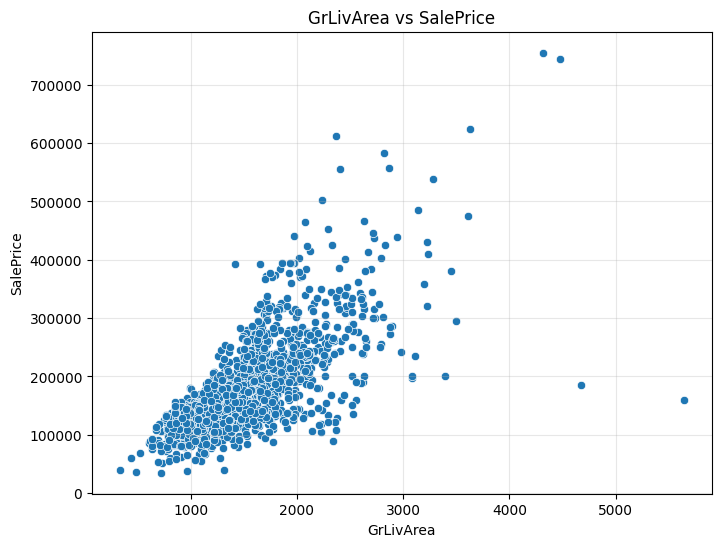

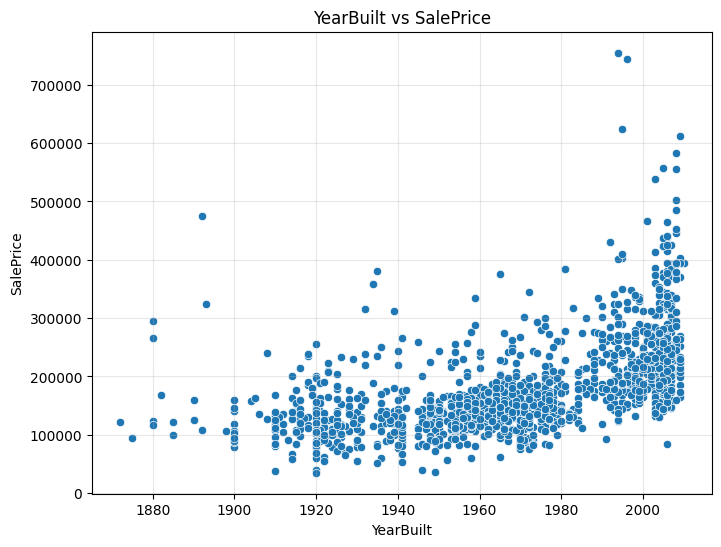

In [7]:
# Scatterplots for numerical variables
numerical_vars = ['GrLivArea', 'YearBuilt']
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=var, y='SalePrice', data=data)
    plt.title(f'{var} vs SalePrice')
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.grid(alpha=0.3)
    plt.show()

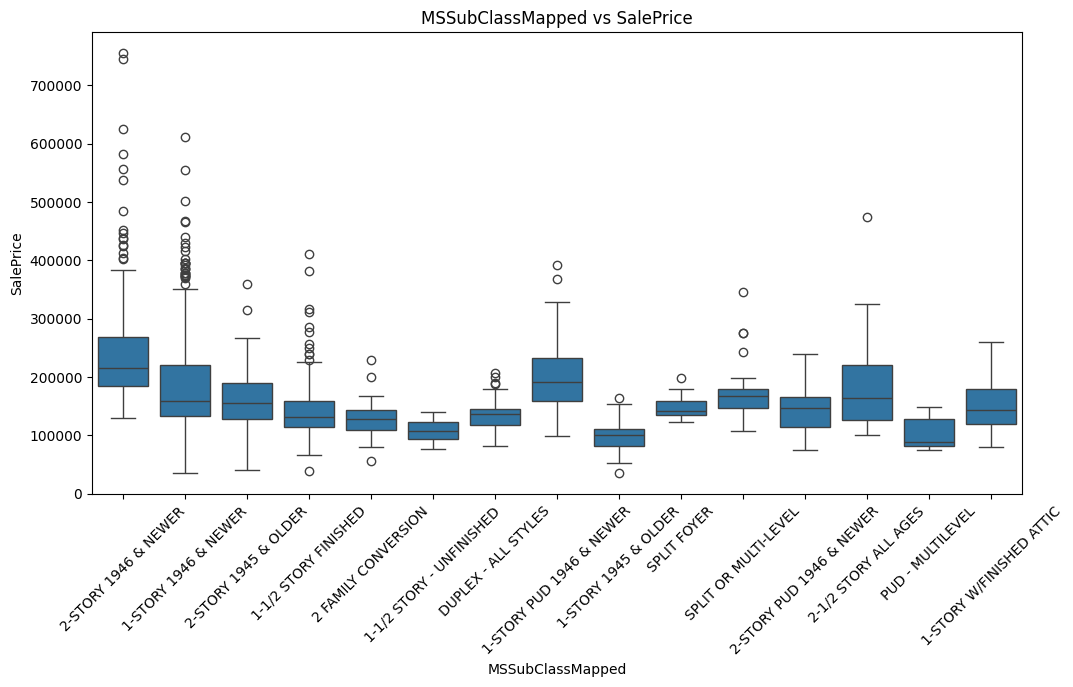

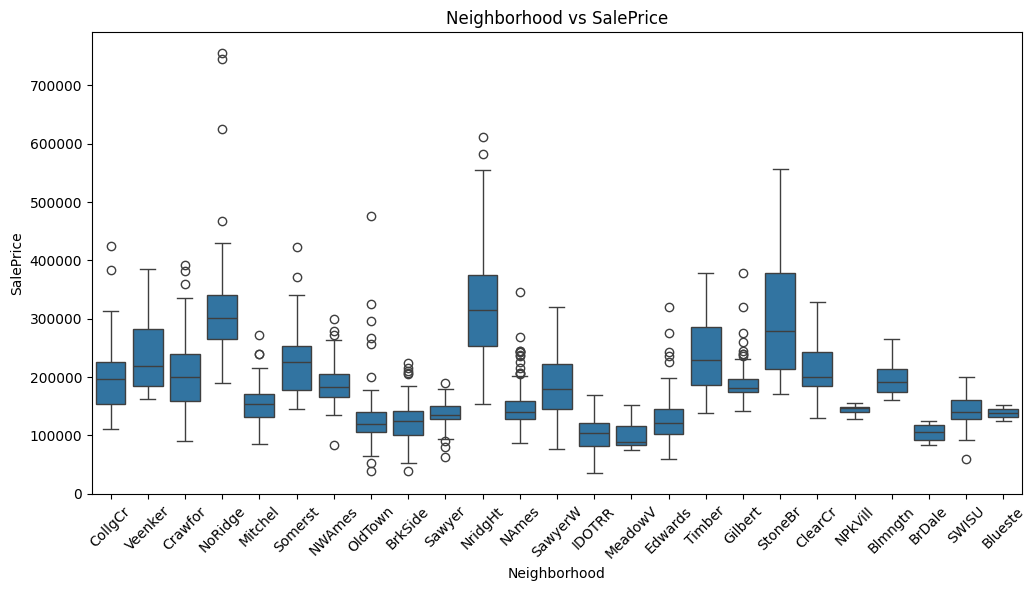

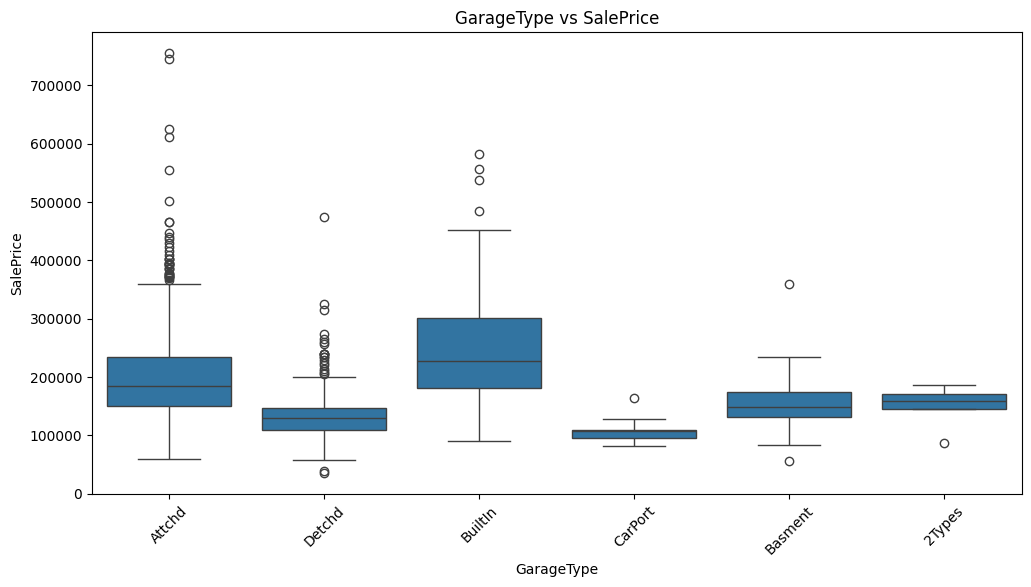

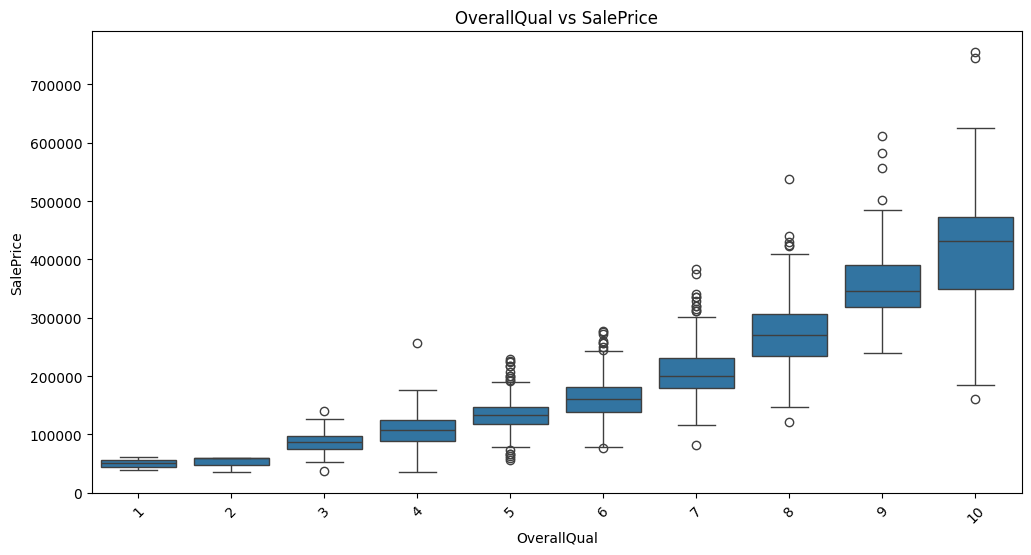

In [8]:
# Boxplots for categorical variables
categorical_vars = ['MSSubClassMapped', 'Neighborhood', 'GarageType','OverallQual']
for var in categorical_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=var, y='SalePrice', data=data)
    plt.title(f'{var} vs SalePrice')
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

### *Patterns, outliers, and anomalies*

### Observations on Variables

**'GrLivArea'**
- **Pattern:** Positive linear relationship with `SalePrice`.
- **Outliers:**
    - Only 4 listings exceed 4000 sqft.
    - The largest listing (over 4000 sqft) is surprisingly cheap, priced under $200k.
- **Anomalies:** None identified.

**'OverallQual'**
- **Pattern:** Positive linear relationship; better quality correlates with higher `SalePrice`.
- **Outliers:**
    - Quality score 4 has one outlier priced about $75k higher than other listings.
- **Anomalies:** Higher quality scores exhibit greater variance. A box plot may help visualize this.

**'YearBuilt'**
- **Pattern:** No obvious correlation with `SalePrice`.
- **Outliers:**
    - A house built around 1890 is over $100k more expensive than the next most expensive.
    - Some houses built in the 1990s are at least $200k more expensive than the next.
- **Anomalies:** Unclear.

**'MSSubClass'**
- **Pattern:**
    - "2-Story 1946 & Newer" has the highest maximum price and average price but also many outliers.
    - "1-Story PUD 1946 & Newer" has the lowest average and minimum prices.
    - Median distributions show little variance, suggesting it may not be a strong predictor.
- **Outliers:**
    - "2-Story 1946 & Newer" and "1-Story 1946 & Newer" have outliers above the plot.
- **Anomalies:** Unclear.

**'Neighborhood'**
- **Pattern:** Significant variance in median `SalePrice`, indicating it might be a strong predictor.
- **Outliers:**
    - "NoRidge" has an average around $300k but outliers peak over $700k.
- **Anomalies:** Unclear.

**'GarageType'**
- **Pattern:** Some variance in median `SalePrice` across categories.
- **Outliers:**
    - "Attachd" has many outliers above the plot.
- **Anomalies:** Unclear.


#### Class Inbalance Check
First, checking the distribution of Target Variable SalePrice

Then, checking distibution of 6 chosen attributes. Optional, but will benefit analysis

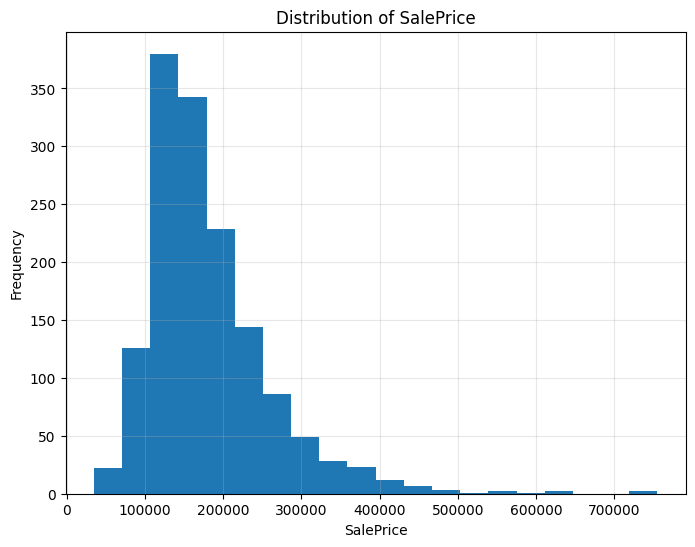

In [9]:
# Plot a histogram for the target variable
data['SalePrice'].hist(bins=20, figsize=(8, 6))
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

- The distribution of SalePrice is right-skewed (positively skewed), meaning most of the house prices are concentrated in the lower range (e.g., below $200,000), while fewer houses are in the higher price ranges.

- There is a long tail extending toward higher prices, indicating a small number of expensive houses.

- Models might struggle to predict higher-priced houses accurately because they are underrepresented in the data.

In [10]:
# OPTIONAL: Check class distribution for categorical variables
categorical_vars = ['MSSubClassMapped', 'Neighborhood', 'GarageType']
for var in categorical_vars:
    print(f"Class distribution for {var}:")
    print(data[var].value_counts(normalize=True) * 100)  # Display percentages
    print("\n")

Class distribution for MSSubClassMapped:
MSSubClassMapped
1-STORY 1946 & NEWER        36.712329
2-STORY 1946 & NEWER        20.479452
1-1/2 STORY FINISHED         9.863014
1-STORY PUD 1946 & NEWER     5.958904
1-STORY 1945 & OLDER         4.726027
2-STORY PUD 1946 & NEWER     4.315068
2-STORY 1945 & OLDER         4.109589
SPLIT OR MULTI-LEVEL         3.972603
DUPLEX - ALL STYLES          3.561644
2 FAMILY CONVERSION          2.054795
SPLIT FOYER                  1.369863
2-1/2 STORY ALL AGES         1.095890
1-1/2 STORY - UNFINISHED     0.821918
PUD - MULTILEVEL             0.684932
1-STORY W/FINISHED ATTIC     0.273973
Name: proportion, dtype: float64


Class distribution for Neighborhood:
Neighborhood
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.

In [11]:
# OPTIONAL: Plot histograms for numerical variables
#numerical_vars = ['GrLivArea', 'OverallQual', 'YearBuilt']
#for var in numerical_vars:
#    data[var].hist(bins=20, figsize=(8, 6))
#    plt.title(f"Distribution of {var}")
#    plt.xlabel(var)
#    plt.ylabel("Frequency")
#    plt.grid(alpha=0.3)
#    plt.show()

### 2.2 Handle missing values and clean data
- Impute or drop missing values (as applicable).
- Remove or transform outliers (as applicable).
- Convert categorical data to numerical format using encoding (as applicable).

In [12]:
# List of 6 interesting variables
chosen_vars = ['GrLivArea', 'OverallQual', 'YearBuilt', 'MSSubClassMapped', 'Neighborhood', 'GarageType']

# Check for missing values in the chosen variables
missing_values = data[chosen_vars].isnull().sum()

# Calculate the percentage of missing values
total_records = len(data)
missing_percentage = (missing_values / total_records) * 100

# Combine the counts and percentages into a DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

# Display the result
print("Missing values in the chosen variables:")
print(missing_summary)

Missing values in the chosen variables:
                  Missing Count  Missing Percentage
GrLivArea                     0            0.000000
OverallQual                   0            0.000000
YearBuilt                     0            0.000000
MSSubClassMapped              0            0.000000
Neighborhood                  0            0.000000
GarageType                   81            5.547945


There are clear visual outliers in the target variable (houses over $500k) and in the GrLivArea variable (values over 4000). Before we make changes, let's see how many records would be impacted:

In [13]:
# Total number of records in the dataset
total_records = len(data)

# Count values where SalePrice > 500k
saleprice_above_500k = data[data['SalePrice'] > 500000]
count_saleprice_above_500k = len(saleprice_above_500k)
percentage_saleprice_above_500k = (count_saleprice_above_500k / total_records) * 100

# Count values where GrLivArea > 4000
grlivarea_above_4000 = data[data['GrLivArea'] > 4000]
count_grlivarea_above_4000 = len(grlivarea_above_4000)
percentage_grlivarea_above_4000 = (count_grlivarea_above_4000 / total_records) * 100

# Print results
print(f"Number of houses with SalePrice > 500k: {count_saleprice_above_500k} ({percentage_saleprice_above_500k:.2f}%)")
print(f"Number of houses with GrLivArea > 4000: {count_grlivarea_above_4000} ({percentage_grlivarea_above_4000:.2f}%)")

Number of houses with SalePrice > 500k: 9 (0.62%)
Number of houses with GrLivArea > 4000: 4 (0.27%)


These outlier records represent a very small portion of the total data. Let's remove them to reduce skew.

In [14]:
# Remove outliers where SalePrice > 500k or GrLivArea > 4000
data_cleaned = data[(data['SalePrice'] <= 500000) & (data['GrLivArea'] <= 4000)]

# Calculate the number of records removed
records_removed = len(data) - len(data_cleaned)

# Print the results
print(f"Original dataset size: {len(data)}")
print(f"Cleaned dataset size: {len(data_cleaned)}")
print(f"Number of records removed: {records_removed}")

Original dataset size: 1460
Cleaned dataset size: 1449
Number of records removed: 11


### 2.3 Feature selection and engineering
- Create new features (as applicable).
- Transform or combine existing features to improve model performance (as applicable).
- Scale or normalize data (as applicable).

   YearBuilt  HouseAge
0       2003        22
1       1976        49
2       2001        24
3       1915       110
4       2000        25


C:\Users\drumm\AppData\Local\Temp\ipykernel_37624\1281531098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.loc[:, 'HouseAge'] = 2025 - data_cleaned['YearBuilt']


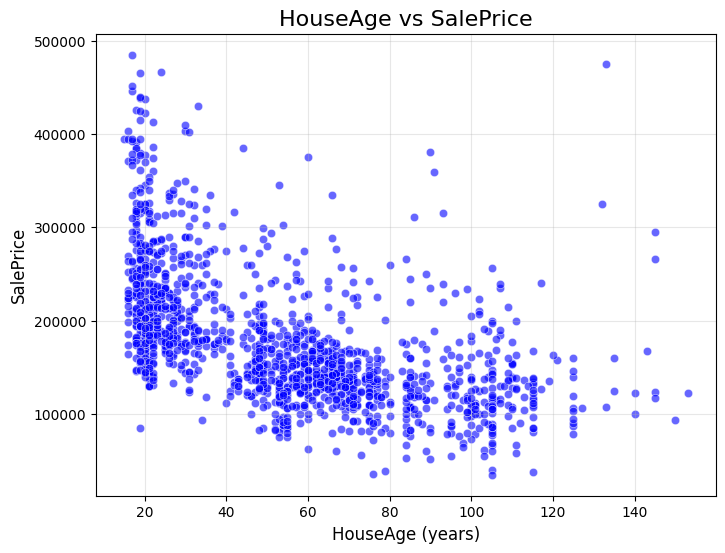

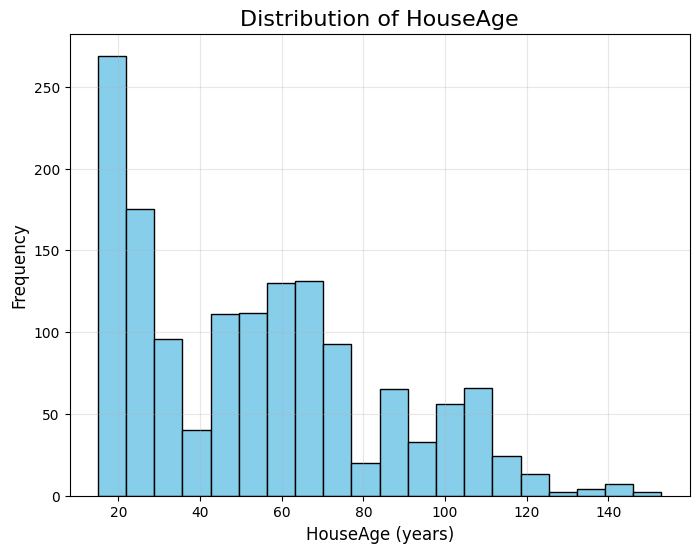

In [15]:
# Create the HouseAge feature using .loc
data_cleaned.loc[:, 'HouseAge'] = 2025 - data_cleaned['YearBuilt']

# Display the first few rows to verify
print(data_cleaned[['YearBuilt', 'HouseAge']].head())

# Scatterplot of HouseAge vs SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='HouseAge', y='SalePrice', data=data_cleaned, color='blue', alpha=0.6)
plt.title("HouseAge vs SalePrice", fontsize=16)
plt.xlabel("HouseAge (years)", fontsize=12)
plt.ylabel("SalePrice", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Visualize the distribution of the HouseAge variable
plt.figure(figsize=(8, 6))
data_cleaned['HouseAge'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of HouseAge", fontsize=16)
plt.xlabel("HouseAge (years)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [16]:
# Define numerical and categorical features
numerical_features = ['GrLivArea', 'HouseAge']
categorical_features_onehot = ['Neighborhood','MSSubClassMapped']  # Use OneHotEncoding for these
categorical_features_ordinal = ['OverallQual']  # Use OrdinalEncoding for these

# Define transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse_output=False, drop='first')
ordinal = OrdinalEncoder()

# Combine transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),  # Scale numerical features
        ('onehot', ohe, categorical_features_onehot),  # OneHotEncode selected categorical features
        ('ordinal', ordinal, categorical_features_ordinal)  # OrdinalEncode selected categorical features
    ]
)

# Apply transformations
data_transformed = preprocessor.fit_transform(data_cleaned)

# Get feature names for the transformed data
numerical_feature_names = numerical_features
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features_onehot)
ordinal_feature_names = categorical_features_ordinal
all_feature_names = list(numerical_feature_names) + list(onehot_feature_names) + list(ordinal_feature_names)

# Convert the transformed data back to a DataFrame
data_transformed_df = pd.DataFrame(data_transformed, columns=all_feature_names, index=data_cleaned.index)

# Display the first few rows of the transformed data
print(data_transformed_df.head())

   GrLivArea  HouseAge  Neighborhood_Blueste  Neighborhood_BrDale  \
0   0.429359 -1.059956                   0.0                  0.0   
1  -0.487725 -0.165020                   0.0                  0.0   
2   0.584935 -0.993664                   0.0                  0.0   
3   0.443688  1.856873                   0.0                  0.0   
4   1.428324 -0.960518                   0.0                  0.0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                   0.0                   0.0                   1.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   1.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                   0.0                   0.0                   0.0   
1               

### Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

Outliers were removed in the following variables:

- GrLivArea: records > 4000 sqft were priced significantly lower than expected, so they were removed.
- SalePrice (target variable): records > $500k were found to be outliers and removed from analysis.

Features that stands out: 

- OverallQual has what appears to be a strong positive correlation with SalePrice; higher quality scores generally correspond to higher prices.
- Neighborhood has significant variance in median SalePrice, suggesting it might be a strong categorical predictor as well

Preprocessing steps:

- Created HouseAge to replace YearBuilt. See explanation in following cell.
- Encoded categorical variables for compatibility with machine learning models.
- Used StandardScaler to standardize numerical features for better fit with machine learning models.

### *Why Create HouseAge Instead of Using YearBuilt?*
Creating HouseAge has several advantages over directly using YearBuilt:

- Interpretability:

    - HouseAge is easier to interpret because it directly represents how old a house is, which is often more meaningful than the year it was built.

- Linear Relationships:

    - HouseAge may have a more linear relationship with the target variable (SalePrice) compared to YearBuilt, which is often non-linear.

- Temporal Relevance:

    - YearBuilt is tied to a specific calendar year, which may lose relevance over time. HouseAge dynamically adjusts as the current year changes, making it more robust for future predictions.

- Feature Scaling:

    - YearBuilt has a large range (e.g., 1800–2025), which can make it harder to scale or normalize. HouseAge typically has a smaller range (e.g., 0–200), making it easier to work with.

---

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target
- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Select a target variable (as applicable)
- Regression: Continuous target variable (e.g., price, temperature).
- Classification: Categorical target variable (e.g., gender, species).
- Clustering: No target variable.
- Justify your selection with reasoning.


In [17]:
##############################################################################################
# Define Target and Input Features for Regression Analysis
##############################################################################################

# Target feature
target_feature = 'SalePrice'  # Numerical (continuous)

# Input features
input_features = {
    'GrLivArea': 'Numerical',
    'HouseAge': 'Numerical',
    'OverallQual': 'Categorical (Ordinal)',
    'MSSubClassMapped': 'Categorical (Nominal)',
    'Neighborhood': 'Categorical (Nominal)'
}

# Display the target and input features
print("### Regression Analysis ###")
print(f"Target Feature: {target_feature} (Numerical - Continuous)")
print("\nInput Features:")
for feature, feature_type in input_features.items():
    print(f"- {feature}: {feature_type}")

### Regression Analysis ###
Target Feature: SalePrice (Numerical - Continuous)

Input Features:
- GrLivArea: Numerical
- HouseAge: Numerical
- OverallQual: Categorical (Ordinal)
- MSSubClassMapped: Categorical (Nominal)
- Neighborhood: Categorical (Nominal)


### 3.2 Define X and y
- Assign input features to X
- Assign target variable to y (as applicable)


In [18]:
# Define the target variable (y) for Linear Regression
y_linear = data_cleaned['SalePrice']

# Define the input features (X) for Linear Regression (exclude Neighborhood and MSSubClassMapped)
X_linear = data_cleaned[['GrLivArea', 'HouseAge', 'OverallQual']]


# Display the shapes of X and y to confirm
print(f"Shape of X_linear: {X_linear.shape}")
print(f"Shape of y_linear: {y_linear.shape}")

Shape of X_linear: (1449, 3)
Shape of y_linear: (1449,)


### Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?

### Justification for Regression and Feature Selection

The target variable, `SalePrice`, was chosen as it represents the continuous outcome we aim to predict, making this a regression problem. The input features were selected based on their potential correlation with `SalePrice`:

- **GrLivArea** and **HouseAge** are numerical features likely to have a direct impact on housing prices (e.g., larger houses or newer houses may be more expensive).
- **OverallQual**  is a ordinal categorical feature that captures quality and property type, which are strong indicators of value. It can also be used for Linear Regression
- **Neighborhood** and **MSSubClassMapped** are nominal categorical features, which will not be used for the Linear Regression since they are more adaptable to categorical-friendly models like Decision Trees and Gradient Boosting.

These features were chosen to balance interpretability and predictive power for the regression analysis.

---

## Section 4. Train a Model (Linear Regression)
### 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).
### 4.2 Train model using Scikit-Learn model.fit() method
### 4.3 Evalulate performance, for example:
- Regression: R^2, MAE, RMSE (RMSE has been recently updated)
- Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
- Clustering: Inertia, Silhouette Score

In [19]:
# Fit the preprocessing pipeline to the cleaned data
preprocessor.fit(data_cleaned)

# Retrieve feature names for the transformed data
numerical_feature_names = numerical_features
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features_onehot)
ordinal_feature_names = categorical_features_ordinal

# Combine all feature names
all_lr_feature_names = list(numerical_feature_names) + list(ordinal_feature_names)

# Display the feature names
print("Transformed feature names:")
print(all_lr_feature_names)

Transformed feature names:
['GrLivArea', 'HouseAge', 'OverallQual']


In [20]:
# Get the list of feature names from the transformed data
feature_names = all_lr_feature_names  # Use the variable containing all transformed feature names

results = []  # Initialize an empty list to store results

# Generate all possible combinations of features
for r in range(1, len(feature_names) + 1):  # r is the number of features in the combination
    for combination in combinations(feature_names, r):
        # Define X and y
        X_combination = data_transformed_df[list(combination)]  # Use the current combination of features
        y = data_cleaned['SalePrice']  # Target variable
        
        # Split the data into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X_combination, y, test_size=0.2, random_state=42)
        
        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Make predictions on the validation set
        y_val_pred = model.predict(X_val)
        
        # Evaluate the model's performance
        mse = mean_squared_error(y_val, y_val_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val, y_val_pred)
        r2 = r2_score(y_val, y_val_pred)
        
        # Store results
        results.append({
            'Features': combination,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2
        })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Ensure R2 column is numeric
results_df['R2'] = pd.to_numeric(results_df['R2'], errors='coerce')

# Sort results by R² score in descending order
results_df = results_df.sort_values(by='R2', ascending=False)

# Save all results to a CSV file
results_df.to_csv('feature_combinations_results.csv', index=False)

# Display the top 3 results
print("Top 3 feature combinations:")
print(results_df.head(3))

Top 3 feature combinations:
                             Features           MAE          RMSE        R2
6  (GrLivArea, HouseAge, OverallQual)  24857.337512  33146.294660  0.781937
4            (GrLivArea, OverallQual)  26876.900067  36680.203776  0.732960
3               (GrLivArea, HouseAge)  28549.957170  39241.899708  0.694358


### Performance Validation: Predicted Values vs. Actual Values

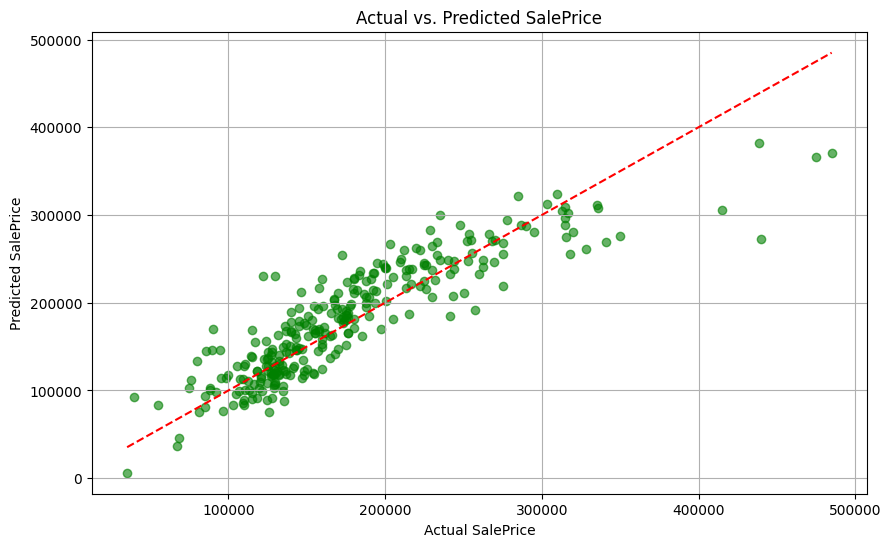

In [21]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6, color='green')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted SalePrice')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.grid()
plt.show()

### Cross-Validation to further check model performance

In [22]:
# Evaluate the model's performance
# Perform cross-validation
cv_scores = cross_val_score(model, X_combination, y, cv=5, scoring='r2')  # 5-fold cross-validation
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of R² Scores: {np.std(cv_scores):.2f}")

Cross-Validation R² Scores: [0.7852374  0.79655077 0.76784012 0.76806285 0.74053206]
Mean R² Score: 0.77
Standard Deviation of R² Scores: 0.02


### Learning Curve Analysis to further check model performance

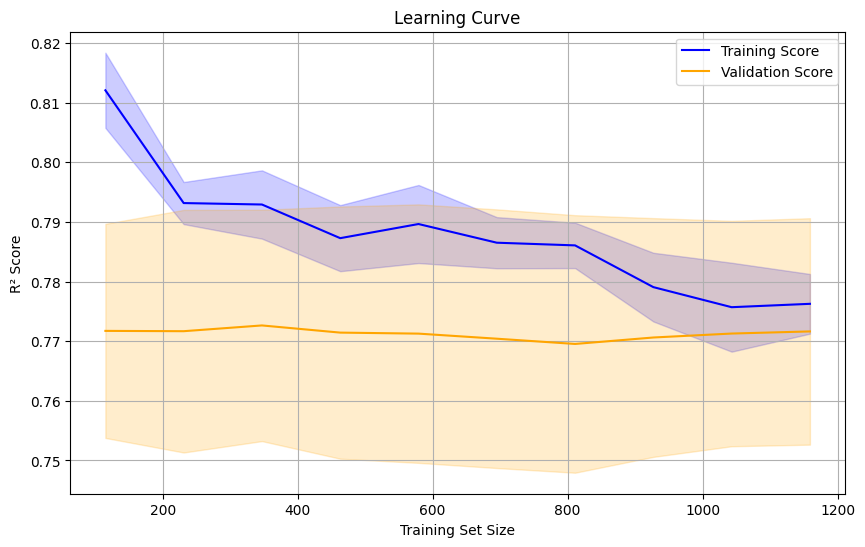

In [23]:
# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    model, X_combination, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_mean, label='Validation Score', color='orange')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.legend()
plt.grid()
plt.show()

### Final Check: Correlation Matrix to check for Multicollinearity

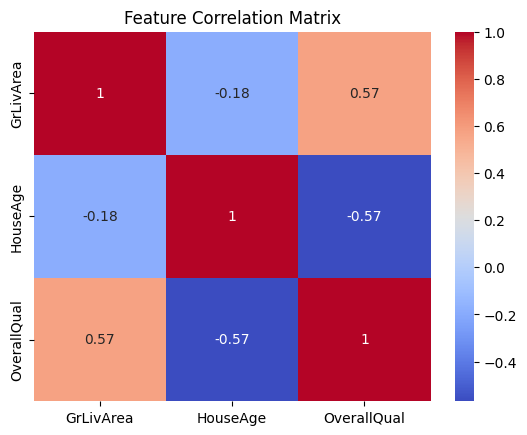

In [24]:
# Compute correlation matrix
correlation_matrix = data_cleaned[['GrLivArea', 'HouseAge', 'OverallQual']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

### Reflection 4: How well did the model perform? Any surprises in the results?

# Model Evaluation Report

## Top 3 Feature Combinations

### 1. (GrLivArea, HouseAge, OverallQual)
- **MAE**: 24,857.34  
- **RMSE**: 33,146.29  
- **R²**: 0.7819  
- _This combination performed the best, achieving the lowest error metrics (MAE and RMSE) and the highest R² score. Including all three features captures the most variance in SalePrice._

### 2. (GrLivArea, OverallQual)
- **MAE**: 26,876.90  
- **RMSE**: 36,680.20  
- **R²**: 0.7330  
- _Excluding HouseAge slightly reduces performance, indicating that HouseAge contributes meaningful information to the model._

### 3. (GrLivArea, HouseAge)
- **MAE**: 28,549.96  
- **RMSE**: 39,241.90  
- **R²**: 0.6944  
- _Excluding OverallQual results in the weakest performance, suggesting that OverallQual is a critical predictor of SalePrice._

---

## Cross-Validation Results

- **R² Scores**: [0.7852, 0.7966, 0.7678, 0.7681, 0.7405]  
- **Mean R²**: 0.77  
- **Standard Deviation**: 0.02  

_The cross-validation results show consistent performance across folds, indicating that the model generalizes well to unseen data._

---

## Learning Curve Insights

- **Training Score**: Starts high and decreases as the training set size increases, indicating learning progression.
- **Validation Score**: Remains stable, suggesting good generalization and no overfitting.
- **Gap Between Scores**: Indicates potential for improvement, possibly by adding more features or using a more complex model.

---

## Correlation Matrix Insights

- **GrLivArea and OverallQual**: Moderate positive correlation (0.57), suggesting both are strong predictors.
- **HouseAge**: Weaker correlation with other features, but its inclusion still improves model performance.

---

## Summary

- The best-performing model achieved an **R² of 0.7819** and a **low RMSE of 33,146.29**.
- **Top Feature Set**: GrLivArea, HouseAge, and OverallQual.
- The model shows **strong generalization** and is **not overfitting**, as supported by cross-validation and learning curve analysis.
- _To further improve performance, consider exploring additional features or more advanced models such as Random Forest or Gradient Boosting._


## Section 5. Improve the Model or Try Alternates (Implement Pipelines)
### 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.


In [26]:
# Define numerical and categorical features
numerical_features = ['GrLivArea', 'HouseAge']
categorical_features_ordinal = ['OverallQual']

# Define transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())                 # Scale numerical features
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('ordinal', OrdinalEncoder())                          # Ordinal encode categorical features
])

# Combine transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ord', ordinal_transformer, categorical_features_ordinal)
    ]
)

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('model', LinearRegression())    # Linear Regression model
])

# Define X and y
X = data_cleaned[['GrLivArea', 'HouseAge', 'OverallQual']]
y = data_cleaned['SalePrice']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 33146.29
R²: 0.78


### 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression.


In [28]:
# Define numerical and categorical features
numerical_features = ['GrLivArea', 'HouseAge']
categorical_features_ordinal = ['OverallQual']

# Define transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),  # Generate polynomial features
    ('scaler', StandardScaler())  # Scale numerical features
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('ordinal', OrdinalEncoder())  # Ordinal encode categorical features
])

# Combine transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ord', ordinal_transformer, categorical_features_ordinal)
    ]
)

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('model', LinearRegression())  # Linear Regression model
])

# Define X and y
X = data_cleaned[['GrLivArea', 'HouseAge', 'OverallQual']]
y = data_cleaned['SalePrice']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 31613.86
R²: 0.80


### 5.3 Compare performance of all models across the same performance metrics


# Model Performance Comparison

## Original Analysis
- **Best Model**: (GrLivArea, HouseAge, OverallQual)  
- **RMSE**: 33,146.29  
- **R²**: 0.7819

## Pipeline 1
- **RMSE**: 33,146.29  
- **R²**: 0.78  
- _This pipeline performed similarly to the original analysis. It used imputation and scaling but did not introduce additional complexity._

## Pipeline 2
- **RMSE**: 31,613.86  
- **R²**: 0.80  
- _This pipeline outperformed both the original analysis and Pipeline 1, likely due to the inclusion of polynomial features (degree 3), which captured non-linear relationships in the data._

### Reflection 5: Which models performed better? How does scaling impact results?

## Insights on Scaling

### Scaling Impact
- Scaling ensures that numerical features are on the same scale.
- This is especially important when:
  - Using polynomial features
  - Employing models sensitive to feature magnitudes (e.g., Linear Regression)
- In **Pipeline 2**, scaling likely enhanced the model's ability to handle polynomial features effectively, leading to improved performance.

---

## Conclusion

- **Best Model**: **Pipeline 2**  
  - **RMSE**: 31,613.86  
  - **R²**: 0.80  
- **Key Takeaway**:  
  Adding polynomial features and applying scaling improved the model's capacity to capture complex, non-linear relationships—resulting in better predictive performance.

## Section 6. Final Thoughts & Insights
### 6.1 Summarize findings.


### 6.2 Discuss challenges faced.


### 6.3 If you had more time, what would you try next?


### Reflection 6: What did you learn from this project?